<a href="https://colab.research.google.com/github/phoughton/ensign_multicat/blob/master/ensign_multicat_trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
!pip install -Uqq fastbook
!pip install fastcore==1.0.9
import fastbook
fastbook.setup_book()

from fastbook import *
import shutil

In [65]:
key = 'XXX'

In [66]:
image_types = 'jolly rogger','british','french', 'irish', 'netherlands', 'deutschland','scottish'
path = Path('flags')
image_types

('jolly rogger',
 'british',
 'french',
 'irish',
 'netherlands',
 'deutschland',
 'scottish')

In [67]:
if path.exists():
  shutil.rmtree(path)

path.mkdir()

for o in image_types:
  dest = (path/o.replace(' ', '_'))
  dest.mkdir(exist_ok=True)
  results = search_images_bing(key, f'{o} flag')
  print(results[0])
  download_images(dest, urls=results.attrgot('content_url'))

{'additional_properties': {'isFamilyFriendly': True}, '_type': 'ImageObject', 'id': None, 'read_link': None, 'web_search_url': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=jolly+rogger+flag&id=5419D6A046B1D8F03AE65CC7B2D6847072ACAA4A&simid=608021366235792299', 'name': 'Jolly Roger Motorcycle Flag | Jolly Roger Skull Flag', 'url': None, 'image': None, 'description': None, 'alternate_name': None, 'bing_id': None, 'thumbnail_url': 'https://tse4.mm.bing.net/th?id=OIP.RVlVJeFXdI5tWA7qeHG89AHaEx&pid=Api', 'provider': None, 'date_published': '2020-06-15T00:36:00.0000000Z', 'text': None, 'content_url': 'https://cdn11.bigcommerce.com/s-f0564/images/stencil/1280x1280/products/229/2577/FLG-JR_Jolly_Roger_flag_6x9_BACK__02394.1547579103.png?c=2', 'host_page_url': 'https://www.thepropad.com/jolly-roger-motorcycle-flag/', 'content_size': '640912 B', 'encoding_format': 'png', 'host_page_display_url': 'https://www.thepropad.com/jolly-roger-motorcycle-flag', 'width': 1280, 'height': 

{'additional_properties': {'hostPageFavIconUrl': 'https://www.bing.com/th?id=ODF.tSVgqzqfumJlqp8DcAo62w&pid=Api', 'isFamilyFriendly': True, 'hostPageDomainFriendlyName': 'Creative Market'}, '_type': 'ImageObject', 'id': None, 'read_link': None, 'web_search_url': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=british+flag&id=84C6E6FBCE819D6BE066E397FBEB114A02418258&simid=608041629910303853', 'name': 'British flag vector ~ Graphic Objects ~ Creative Market', 'url': None, 'image': None, 'description': None, 'alternate_name': None, 'bing_id': None, 'thumbnail_url': 'https://tse3.mm.bing.net/th?id=OIP.e_bbO_MwobphE7AiIzUzyQHaEA&pid=Api', 'provider': None, 'date_published': '2019-09-06T21:06:00.0000000Z', 'text': None, 'content_url': 'https://cmkt-image-prd.global.ssl.fastly.net/0.1.0/ps/1822915/6793/3682/m1/fpnw/wm1/british-flag-.jpg?1477811604&s=392fc272ec4e558e1e9f3b7dea190f2f', 'host_page_url': 'https://creativemarket.com/TeaGraphicDesign/1002071-British-flag-vector', 'c

{'additional_properties': {'hostPageFavIconUrl': 'https://www.bing.com/th?id=ODF.kCKFU1-d0l3Elu2Vvbpmew&pid=Api', 'isFamilyFriendly': True, 'hostPageDomainFriendlyName': 'blogspot.com'}, '_type': 'ImageObject', 'id': None, 'read_link': None, 'web_search_url': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=french+flag&id=74E234C533EE29C6F2411ACE51B31924B96EB995&simid=608020275202359795', 'name': 'Graafix!: Wallpapers Flag of France', 'url': None, 'image': None, 'description': None, 'alternate_name': None, 'bing_id': None, 'thumbnail_url': 'https://tse2.mm.bing.net/th?id=OIP.iwTmd1v6r8VD-rDShTeviwHaF7&pid=Api', 'provider': None, 'date_published': '2019-10-19T04:02:00.0000000Z', 'text': None, 'content_url': 'https://1.bp.blogspot.com/-_nCCCMxPDCo/Tchr7ZYrJPI/AAAAAAAAAwg/r6wf_cmCk-E/s1600/Wallpapers+Flag+of+France.jpg', 'host_page_url': 'https://graafix.blogspot.com/2011/05/wallpapers-flag-of-france.html', 'content_size': '337512 B', 'encoding_format': 'jpeg', 'host_page_d

{'additional_properties': {'isFamilyFriendly': True}, '_type': 'ImageObject', 'id': None, 'read_link': None, 'web_search_url': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=irish+flag&id=B3A9062854493A1E10680A0E60C178293EC289ED&simid=608032911099691144', 'name': 'Irish Flag | Elmers Flag and Banner', 'url': None, 'image': None, 'description': None, 'alternate_name': None, 'bing_id': None, 'thumbnail_url': 'https://tse4.mm.bing.net/th?id=OIP.kuPHK8e-GpOV2PjJlZaF1gHaEc&pid=Api', 'provider': None, 'date_published': '2017-03-16T17:25:00.0000000Z', 'text': None, 'content_url': 'https://elmersflag.com/wp-content/uploads/2017/03/irish-flag14.jpg', 'host_page_url': 'https://elmersflag.com/the-history-of-the-irish-flag-bratach-na-heireann/', 'content_size': '43331 B', 'encoding_format': 'jpeg', 'host_page_display_url': 'https://elmersflag.com/the-history-of-the-irish-flag-bratach-na-heireann', 'width': 1000, 'height': 600, 'thumbnail': <azure.cognitiveservices.search.imagesear

{'additional_properties': {'isFamilyFriendly': True}, '_type': 'ImageObject', 'id': None, 'read_link': None, 'web_search_url': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=netherlands+flag&id=007746C5B815425098BFE52EB62DDD04F9BB5769&simid=608018939459799576', 'name': 'Flag Netherlands | printable flags', 'url': None, 'image': None, 'description': None, 'alternate_name': None, 'bing_id': None, 'thumbnail_url': 'https://tse4.mm.bing.net/th?id=OIP.oKiWH6QcNGAXxQYHKcmdfQHaFj&pid=Api', 'provider': None, 'date_published': '2019-10-23T19:13:00.0000000Z', 'text': None, 'content_url': 'http://www.printableflags.net/wp-content/uploads/2017/04/flag-netherlands-the-netherlands-flag-VNdtiu.jpg', 'host_page_url': 'http://www.printableflags.net/flag-netherlands-565.html', 'content_size': '12695 B', 'encoding_format': 'jpeg', 'host_page_display_url': 'www.printableflags.net/flag-netherlands-565.html', 'width': 1600, 'height': 1200, 'thumbnail': <azure.cognitiveservices.search.images

{'additional_properties': {'hostPageFavIconUrl': 'https://www.bing.com/th?id=ODF.FN1SZscHib3IBjZN9FhjNQ&pid=Api', 'isFamilyFriendly': True, 'hostPageDomainFriendlyName': 'YouTube'}, '_type': 'ImageObject', 'id': None, 'read_link': None, 'web_search_url': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=deutschland+flag&id=5E840D490CFF9AAFCF3CB18FCF533417CA42456B&simid=607994179093990246', 'name': 'Animated Flag of Germany - YouTube', 'url': None, 'image': None, 'description': None, 'alternate_name': None, 'bing_id': None, 'thumbnail_url': 'https://tse1.mm.bing.net/th?id=OIP.w-1JDBEz6LB04HQFYjM9NwHaEK&pid=Api', 'provider': None, 'date_published': '2020-08-02T19:49:00.0000000Z', 'text': None, 'content_url': 'https://i.ytimg.com/vi/2k3kMPgSRE0/maxresdefault.jpg', 'host_page_url': 'https://www.youtube.com/watch?v=2k3kMPgSRE0', 'content_size': '39886 B', 'encoding_format': 'jpeg', 'host_page_display_url': 'https://www.youtube.com/watch?v=2k3kMPgSRE0', 'width': 1280, 'height':

{'additional_properties': {'hostPageFavIconUrl': 'https://www.bing.com/th?id=ODF.AGPwbUDqCPwlkNwuvO3cnw&pid=Api', 'isFamilyFriendly': True, 'hostPageDomainFriendlyName': 'beyondphilosophy.com'}, '_type': 'ImageObject', 'id': None, 'read_link': None, 'web_search_url': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=scottish+flag&id=B6F053A0E50F488B72C1DD535A9E432D86028655&simid=608040874025356246', 'name': 'What Does The Scottish Independence Vote Have to Do with ...', 'url': None, 'image': None, 'description': None, 'alternate_name': None, 'bing_id': None, 'thumbnail_url': 'https://tse1.mm.bing.net/th?id=OIP.nyRORQpja7aT96OJDLd6SgHaE8&pid=Api', 'provider': None, 'date_published': '2019-11-01T19:17:00.0000000Z', 'text': None, 'content_url': 'https://beyondphilosophy.com/wp-content/uploads/2014/11/Scottish-Flag-1.jpg', 'host_page_url': 'https://beyondphilosophy.com/what-does-the-scottish-independence-vote-have-to-do-with-customer-experience/', 'content_size': '46196 B', '

In [68]:
def count_images():
  for image_choice in list(image_types):
    image_choice = image_choice.replace(' ', '_')
    print(image_choice, "\t", len(Path(path/image_choice).ls()))

In [69]:
count_images()

jolly_rogger 	 144
british 	 141
french 	 149
irish 	 143
netherlands 	 150
deutschland 	 149
scottish 	 128


In [70]:
fns = get_image_files(path)
fns

(#1000) [Path('flags/deutschland/00000089.png'),Path('flags/deutschland/00000004.jpg'),Path('flags/deutschland/00000023.jpg'),Path('flags/deutschland/00000025.gif'),Path('flags/deutschland/00000017.jpg'),Path('flags/deutschland/00000130.jpg'),Path('flags/deutschland/00000075.png'),Path('flags/deutschland/00000097.jpg'),Path('flags/deutschland/00000082.png'),Path('flags/deutschland/00000102.jpg')...]

In [71]:
failed = verify_images(fns)
failed

(#27) [Path('flags/deutschland/00000053.jpg'),Path('flags/deutschland/00000065.jpg'),Path('flags/deutschland/00000079.png'),Path('flags/deutschland/00000100.svg'),Path('flags/jolly_rogger/00000082.jpg'),Path('flags/jolly_rogger/00000094.jpg'),Path('flags/jolly_rogger/00000027.jpg'),Path('flags/jolly_rogger/00000036.jpg'),Path('flags/jolly_rogger/00000106.jpg'),Path('flags/jolly_rogger/00000007.jpg')...]

In [72]:
count_images()

jolly_rogger 	 144
british 	 141
french 	 149
irish 	 143
netherlands 	 150
deutschland 	 149
scottish 	 128


In [73]:
failed.map(Path.unlink);
count_images()

jolly_rogger 	 138
british 	 138
french 	 143
irish 	 140
netherlands 	 148
deutschland 	 145
scottish 	 125


In [74]:
valid_files = get_image_files(path)
valid_files

(#973) [Path('flags/deutschland/00000089.png'),Path('flags/deutschland/00000004.jpg'),Path('flags/deutschland/00000023.jpg'),Path('flags/deutschland/00000025.gif'),Path('flags/deutschland/00000017.jpg'),Path('flags/deutschland/00000130.jpg'),Path('flags/deutschland/00000075.png'),Path('flags/deutschland/00000097.jpg'),Path('flags/deutschland/00000082.png'),Path('flags/deutschland/00000102.jpg')...]

In [75]:
for file_path in valid_files:
  if file_path.suffix == '.png':
    if file_path.exists():
      print(f"Loading... {file_path}")

      a_pic = PILImage.create( file_path )
      out_path = Path(file_path.parent/f"{file_path.stem}.jpg")
      a_pic.save(out_path, "JPEG")
      os.remove(file_path)

    else:
      print(f"Couldn't find: {file_path}")

Loading... flags/deutschland/00000089.png
Loading... flags/deutschland/00000075.png
Loading... flags/deutschland/00000082.png
Loading... flags/deutschland/00000141.png
Loading... flags/deutschland/00000091.png
Loading... flags/deutschland/00000052.png


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Loading... flags/deutschland/00000094.png
Loading... flags/deutschland/00000031.png
Loading... flags/deutschland/00000119.png
Loading... flags/deutschland/00000134.png
Loading... flags/deutschland/00000068.png
Loading... flags/deutschland/00000132.png
Loading... flags/deutschland/00000128.png
Loading... flags/deutschland/00000016.png
Loading... flags/deutschland/00000144.png
Loading... flags/deutschland/00000115.png
Loading... flags/deutschland/00000073.png
Loading... flags/deutschland/00000037.png
Loading... flags/deutschland/00000049.png
Loading... flags/deutschland/00000109.png
Loading... flags/deutschland/00000140.png
Loading... flags/deutschland/00000071.png
Loading... flags/deutschland/00000138.png
Loading... flags/deutschland/00000110.png
Loading... flags/deutschland/00000061.png
Loading... flags/deutschland/00000076.png
Loading... flags/deutschland/00000067.png
Loading... flags/deutschland/00000092.png
Loading... flags/deutschland/00000084.png
Loading... flags/deutschland/00000

In [76]:
count_images()

jolly_rogger 	 138
british 	 138
french 	 143
irish 	 140
netherlands 	 148
deutschland 	 145
scottish 	 125


In [77]:

def parent_label_list(label):
  return [parent_label(label)]

flags = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label_list,
    item_tfms=Resize(128))

path.ls()

(#7) [Path('flags/deutschland'),Path('flags/jolly_rogger'),Path('flags/british'),Path('flags/scottish'),Path('flags/irish'),Path('flags/netherlands'),Path('flags/french')]

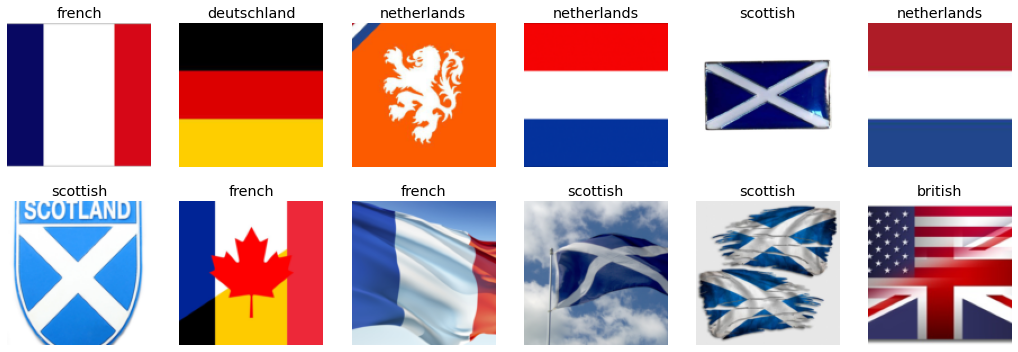

In [78]:
dls = flags.dataloaders(path)
dls.valid.show_batch(max_n=12, nrows=2)

In [83]:
learn = cnn_learner(dls, resnet18, metrics=partial(accuracy_multi, thresh=0.7))
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.920247,0.563234,0.863034,00:20


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.631749,0.437222,0.907953,00:20
1,0.538223,0.334978,0.930781,00:21
2,0.451219,0.265373,0.948454,00:21
3,0.395215,0.248844,0.956554,00:20


In [80]:
preds,targs = learn.get_preds()

In [81]:
accuracy_multi(preds, targs, thresh=0.9, sigmoid=False)

tensor(0.9536)

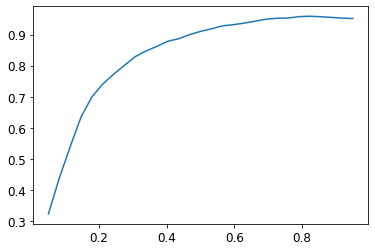

In [82]:
xs = torch.linspace(0.05,0.95,29)
accs = [accuracy_multi(preds, targs, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs,accs);

In [84]:
learn.predict(PILImage.create(Path("pirate_flag.jpg")))

((#1) ['jolly_rogger'],
 tensor([False, False, False, False,  True, False, False]),
 tensor([0.0264, 0.1371, 0.3008, 0.1477, 0.9999, 0.1074, 0.1611]))

In [85]:
learn.export('flag_export.pkl')
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('flag_export.pkl')]